# DSC350 - Term Project - Milestone 5

**Merging the Data and Storing in a Database/Visualizing Data**<br>
Now that you have cleaned and transformed your 3 datasets, you need to load each transformed dataset into a database in Python. You can choose the tool, but SQLite3 is what is recommended.<br>
<br>
Once you have 3 tables in the database you have created, you need to write a query to join the 3 datasets together. Then using this merged dataset, you must create at least 5 visualizations.<br>
<br>
For the visualization portion of the project, you are welcome to use a Python library like Matplotlib, Seaborn or an R package ggplot2, plotly, or Tableau/PowerBI.<br>
<br>
Submit all your code (in Jupyter or PDF), with your visualizations along with a 250-500-word summary that answers the following:<br>
<br>
 - What did you learn?
 - What are you still struggling with?
 - What ethical implications exist when transforming data? What are some ways to mitigate those risks?

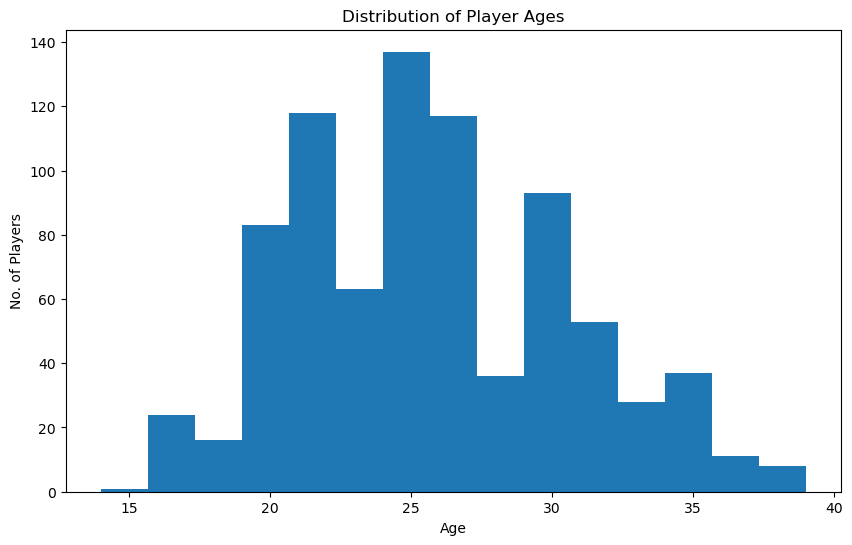

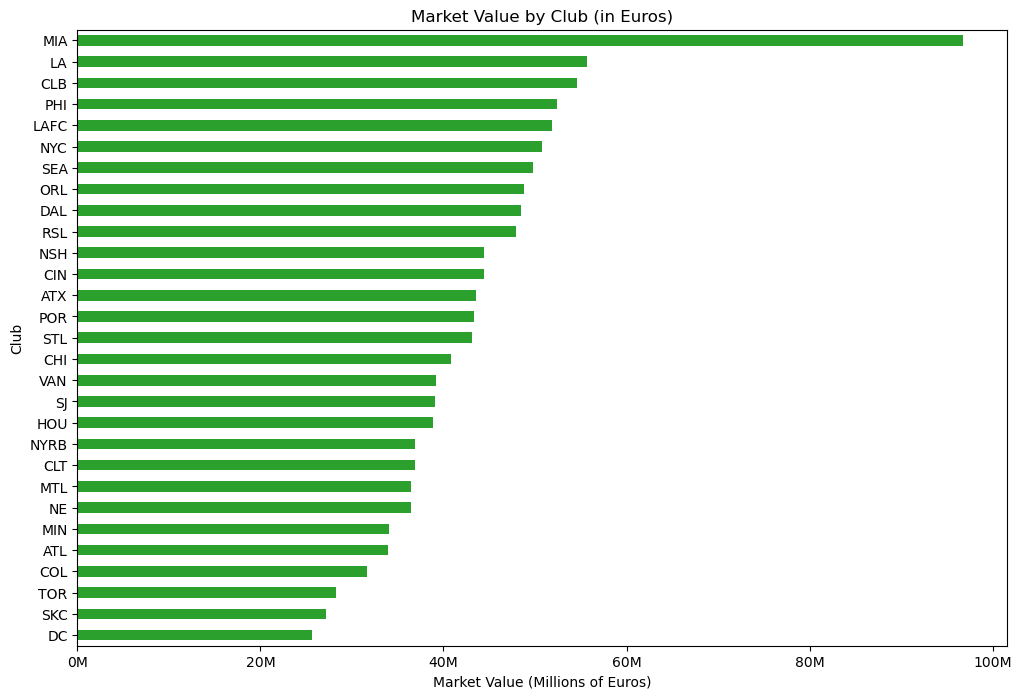

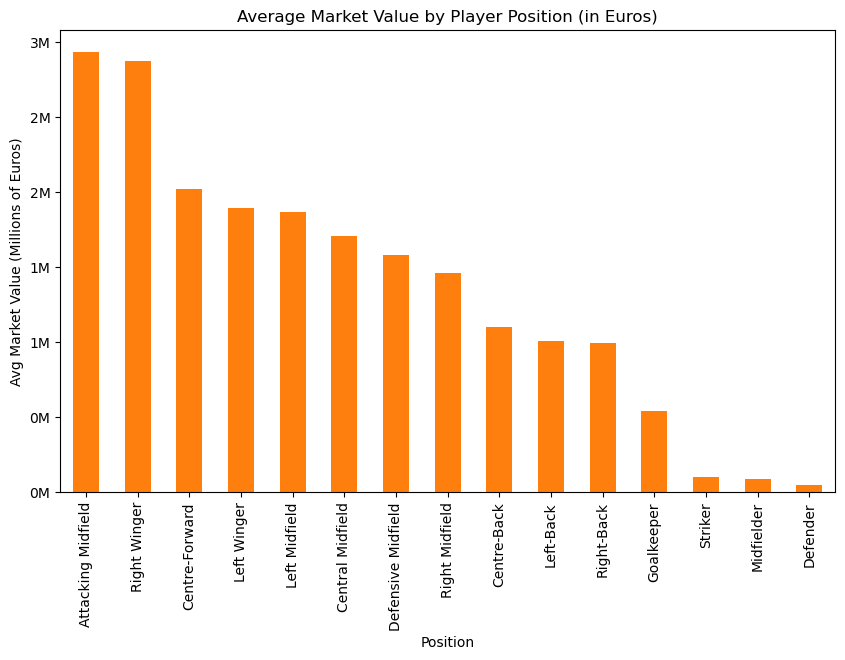

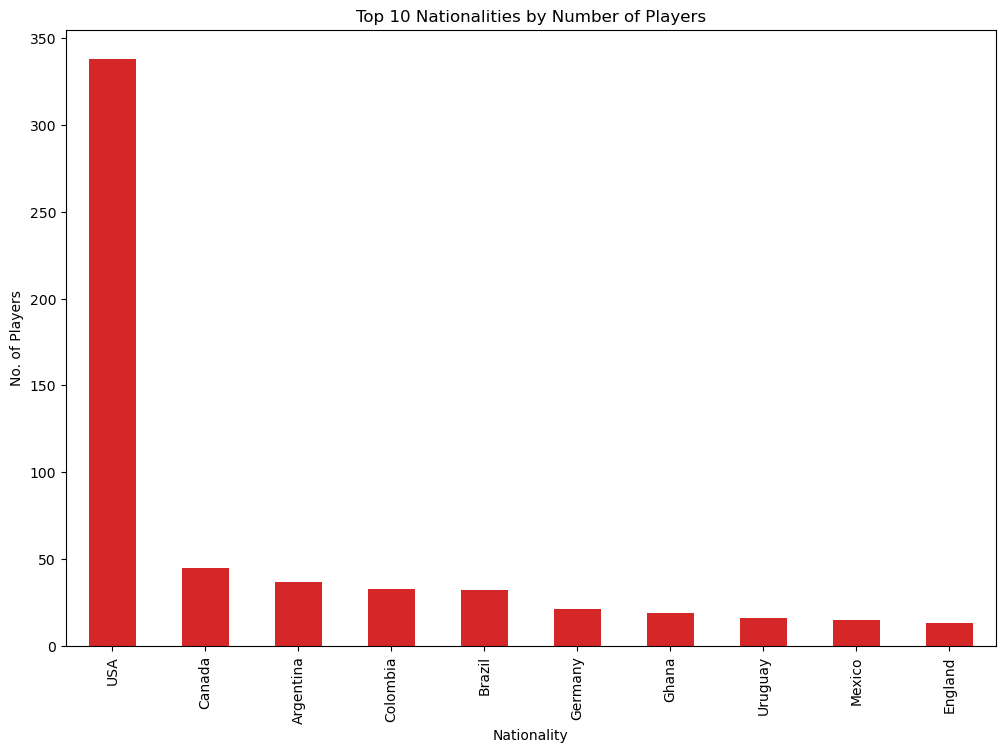

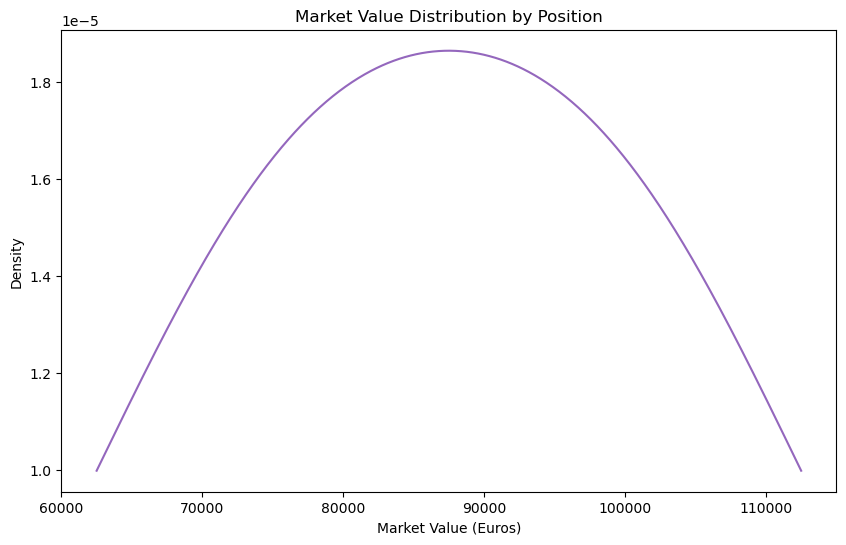

In [1]:
# Import the necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Define file names to be loaded
csv_files = {
    'mls_fbref_stats': (r'C:\Users\thefli0\Downloads\mls_fbref_stats.csv'),
    'mls_cleaned': (r'C:\Users\thefli0\Downloads\mls_cleaned.csv'),
    'mls_transfermarkt_salaries': (r'C:\Users\thefli0\Downloads\MLS_Transfermarkt_Salaries.csv')
}

# Load CSV files into DataFrame
df_stats = pd.read_csv(csv_files['mls_fbref_stats'])
df_cleaned = pd.read_csv(csv_files['mls_cleaned'])
df_salaries = pd.read_csv(csv_files['mls_transfermarkt_salaries'])

# Handle nulls and convert to numeric
df_salaries['market_value (in Euros)'] = pd.to_numeric(df_salaries['market_value (in Euros)'].str.replace(',',''), errors='coerce').fillna(0)

# Create and connect to SQLite3 database
conn = sqlite3.connect('mls_data.db')
cursor = conn.cursor()

# Load DataFrames into SQL tables
df_stats.to_sql('mls_fbref_stats', conn, if_exists='replace', index=False)
df_cleaned.to_sql('mls_cleaned', conn, if_exists='replace', index=False)
df_salaries.to_sql('mls_transfermarkt_salaries', conn, if_exists='replace', index=False)

# Join tables based on 'Squad ID' to 'club_id'
query = """
SELECT
    s.*,
    c.*,
    t.*
FROM
    mls_fbref_stats s
JOIN
    mls_cleaned c ON s."Squad ID" = c.club_id
JOIN
    mls_transfermarkt_salaries t ON c.club_id = t.club_id
"""

df_joined = pd.read_sql_query(query, conn)

# Define color palette for theme
colors = {
    'age_dist': '#1f77b4', # Deep Blue
    'market_value_club': '#2ca02c', # Teal
    'market_value_position': '#ff7f0e', # Coral
    'nationality': '#d62728', # Red
    'position_dist': '#9467bd', # Purple
}

# Visualizations
# 1. Dist of Player Ages
plt.figure(figsize=(10, 6))
df_joined['age'].hist(bins=15, color=colors['age_dist'])
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('No. of Players')
plt.grid(False)
plt.show()

# 2. Market Value by Club
plt.figure(figsize=(12, 8))
market_value_by_club = df_joined.groupby('club')['market_value (in Euros)'].sum().sort_values()
market_value_by_club.plot(kind='barh', color=colors['market_value_club'])
plt.title('Market Value by Club (in Euros)')
plt.xlabel('Market Value (Millions of Euros)')
plt.ylabel('Club')
# Convert axis for readability without presentation changes
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
plt.grid(False)
plt.show()

# 3. Avg Market Value by Player Pos
plt.figure(figsize=(10, 6))
average_market_value_position = df_joined.groupby('position')['market_value (in Euros)'].mean().sort_values(ascending=False)
average_market_value_position.plot(kind='bar', color=colors['market_value_position'])
plt.title('Average Market Value by Player Position (in Euros)')
plt.xlabel('Position')
plt.ylabel('Avg Market Value (Millions of Euros)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
plt.grid(False)
plt.show()

# 4. Num Players by Nationality
plt.figure(figsize=(12, 8))
players_by_nationality = df_joined['nationality'].value_counts().head(10)
players_by_nationality.plot(kind='bar', color=colors['nationality'])
plt.title('Top 10 Nationalities by Number of Players')
plt.xlabel('Nationality')
plt.ylabel('No. of Players')
plt.grid(False)
plt.show()

# 5. Market Value Dist per Position
plt.figure(figsize=(10, 6))
positions = df_joined['position'].unique()
for position in positions:
    subset = df_joined[df_joined['position'] == position]
subset['market_value (in Euros)'].plot(kind='kde', label=position, color=colors['position_dist'])
plt.title('Market Value Distribution by Position')
plt.xlabel('Market Value (Euros)')
plt.ylabel('Density')
plt.grid(False)
plt.show()

# Close connection
conn.close()

Summary document, as referenced in the top of the notebook, was turned in separately.